<a href="https://colab.research.google.com/github/chetansolanke14/Tensorflow_DL/blob/master/RegressionExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [0]:
x_data =np.linspace(0.0,10.0,100000)
noise =np.random.randn(len(x_data))

In [3]:
x_data

array([0.00000e+00, 1.00001e-04, 2.00002e-04, ..., 9.99980e+00,
       9.99990e+00, 1.00000e+01])

In [4]:
noise.shape

(100000,)

y =mx+b

b=5

In [0]:
y_true =(0.5+x_data)+5+noise

In [0]:
x_df =pd.DataFrame(data=x_data,columns =['X data'])
y_df =pd.DataFrame(data=y_true,columns =['Y'])

In [7]:
print(x_df.head())

   X data
0  0.0000
1  0.0001
2  0.0002
3  0.0003
4  0.0004


In [8]:
y_df.head()

,Y
0,4.138140
1,4.241068
2,4.356019
3,5.848887
4,4.212635


In [0]:
my_data = pd.concat([x_df,y_df], axis=1)

In [10]:
my_data.head()

,X data,Y
0,0.0000,4.138140
1,0.0001,4.241068
2,0.0002,4.356019
3,0.0003,5.848887
4,0.0004,4.212635


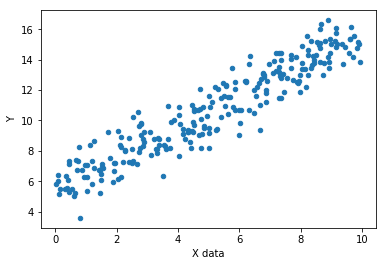

In [11]:
my_data.sample(n=250).plot(kind='scatter',x='X data',y='Y')

In [12]:
batch_size =8
m = tf.Variable(0.81)
b =tf.Variable(0.17)

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
xph = tf.placeholder(tf.float32,[batch_size])

In [0]:
yph = tf.placeholder(tf.float32,[batch_size])

In [0]:
y_model =m*xph+b

In [0]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(0.001)
train =optimizer.minimize(error)

In [0]:
init = tf.global_variables_initializer()

In [0]:
with tf.Session() as sess:
  sess.run(init)
  
  #batches =1000
  batches =10000
  for i in range (batches):
    rand_int =np.random.randint(len(x_data),size=batch_size)
    
    feed ={xph:x_data[rand_int],yph:y_true[rand_int]}
    
    sess.run(train,feed_dict=feed)
    
  model_m,model_b = sess.run([m,b])

In [20]:
model_m

0.97599125

In [21]:
model_b

5.4727454

In [0]:
y_hat =x_data*model_m +model_b

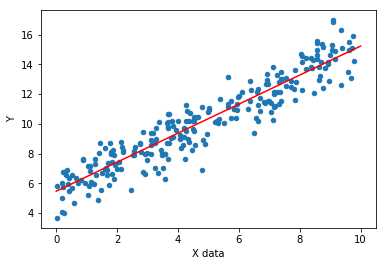

In [23]:
my_data.sample(250).plot(kind='scatter',x ='X data',y ='Y')
plt.plot(x_data,y_hat,'r')

### Regression Task with Tensorflow Estimator API:

In [0]:
feat_cols=[tf.feature_column.numeric_column('x',shape=[1])]

In [25]:
estimator =tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpepoml343', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fde753b9a58>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_eval,y_train,y_eval=train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [28]:
print(x_train.shape)

(70000,)


In [29]:
print(x_eval.shape)

(30000,)


In [0]:
input_func =tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs=None,shuffle=True)

In [0]:
train_input_func =tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8, num_epochs=1000,shuffle=False)

In [0]:
eval_input_func =tf.estimator.inputs.numpy_input_fn({'x':x_eval},y_eval,batch_size=8, num_epochs=1000,shuffle=False)

In [33]:
#Train the estimator:

estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpepoml343/model.ckpt.
INFO:tensorflow:loss = 955.4595, step = 1
INFO:tensorflow:global_step/sec: 804.467
INFO:tensorflow:loss = 18.372042, step = 101 (0.127 sec)
INFO:tensorflow:global_step/sec: 944.701
INFO:tensorflow:loss = 31.201761, step = 201 (0.106 sec)
INFO:tensorflow:global_step/sec: 920.662
INFO:tensorflow:loss = 22.892282, step = 301 (0.110 sec)
INFO:tensorflow:global_step/sec: 932.24
INFO:tensorflow

In [34]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-19T17:29:02Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmpepoml343/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-19-17:29:03
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.3411316, global_step = 1000, label/mean = 10.486944, loss = 10.729053, predict

In [35]:
eval_metric =estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-05-19T17:31:06Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpepoml343/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-05-19-17:31:07
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.3389304, global_step = 1000, label/mean = 10.521519, loss = 10.711443, prediction/mean = 10.240505
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1

In [36]:
print("Training Data Metric")
print(train_metrics)

Training Data Metric
{'average_loss': 1.3411316, 'label/mean': 10.486944, 'loss': 10.729053, 'prediction/mean': 10.2128525, 'global_step': 1000}


In [37]:
print("Eval Data Metric")
print(eval_metric)

Eval Data Metric
{'average_loss': 1.3389304, 'label/mean': 10.521519, 'loss': 10.711443, 'prediction/mean': 10.240505, 'global_step': 1000}


In [0]:
# get predictred values:
brand_new_data =np.linspace(0,10,10)

In [0]:
input_fn_predict =tf.estimator.inputs.numpy_input_fn({'x': brand_new_data},shuffle=False)

In [41]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpepoml343/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.320884], dtype=float32)},
 {'predictions': array([5.6328993], dtype=float32)},
 {'predictions': array([6.944914], dtype=float32)},
 {'predictions': array([8.256929], dtype=float32)},
 {'predictions': array([9.568944], dtype=float32)},
 {'predictions': array([10.880959], dtype=float32)},
 {'predictions': array([12.192974], dtype=float32)},
 {'predictions': array([13.504988], dtype=float32)},
 {'predictions': array([14.817003], dtype=float32)},
 {'predictions': array([16.129019], dtype=float32)}]

In [42]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
  predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpepoml343/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [43]:
predictions

[array([4.320884], dtype=float32),
 array([5.6328993], dtype=float32),
 array([6.944914], dtype=float32),
 array([8.256929], dtype=float32),
 array([9.568944], dtype=float32),
 array([10.880959], dtype=float32),
 array([12.192974], dtype=float32),
 array([13.504988], dtype=float32),
 array([14.817003], dtype=float32),
 array([16.129019], dtype=float32)]

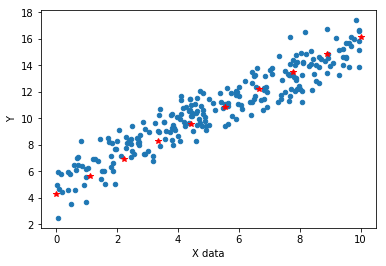

In [44]:
my_data.sample(250).plot(kind='scatter',x='X data',y ='Y')
plt.plot(brand_new_data,predictions,'r*')